# Reading the Web Page into Python

# Wrangling Data

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from itertools import permutations
from itertools import combinations
import matplotlib.pyplot as plt
import calendar
#def get_url(url):
url=['https://www.lotterycorner.com/ga/cash-3-midday/2019',
     'https://www.lotterycorner.com/ga/cash-3-evening/2019',
    'https://www.lotterycorner.com/ga/cash-3-night/2019',
    'https://www.lotterycorner.com/ga/cash-3-midday/2020',
     'https://www.lotterycorner.com/ga/cash-3-evening/2020',
    'https://www.lotterycorner.com/ga/cash-3-night/2020']
yr= 0
#url=['https://www.lotterycorner.com/ga/cash-3-midday/2018']
dfc3 = pd.DataFrame([])
for i in url:
    r = requests.get(url[yr])
    soup= BeautifulSoup(r.text, 'html.parser')
    table = soup.find_all('table')[0] 
    df= pd.read_html(str(table))[0]
    #Make first row the column headers
    df.columns = df.iloc[0]
    df = df[1:]
    # Remove all rows with nulls
    #df.dropna(inplace=True)----
    # Remove the "Jackpot" columns
    df.rename(columns={'Jackpot': 'TimeOfDay'}, inplace=True)
    df['TimeOfDay']= i[42:].rstrip('/2020')
    df['TimeOfDay']= i[42:].rstrip('/2019')
    #Separate and expand data from the 'Winning Numbers' column into other columns beginning with 'Digit'
    df = df.join(df['Winning Numbers'].str.split(' ', expand=True).add_prefix('Digit'))
        #remove white spaces
    df['Winning Numbers'] = df['Winning Numbers'].str.replace(" ","")
        #Add two new columns to dataframe
    df['First2']=df['Winning Numbers'].str[0:2]
    df['FirstLast']=df['Winning Numbers'].str[0] + df['Winning Numbers'].str[2]
    df['Last2']=df['Winning Numbers'].str[1:3]
    
        #Make the Date column a date type
    df['Date'] = pd.to_datetime(df['Date'])
        #Set the Date column as the indate
    df.set_index('Date', inplace=True)  #Makes Date column the Index
    #df.index.name = None
        #Rename Column
    df.rename(columns={'Winning Numbers': 'WinNum'}, inplace=True)
        #Change data type from object to integer
    cols = ['Digit0', 'Digit1', 'Digit2']
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)    
    yr=yr+1
    dfc3=dfc3.append(df)
    dfc3 = dfc3.sort_values(by = ['Date', 'TimeOfDay'], ascending = [True, True])
    #dfc3['TimeOfDay']=df['TimeOfDay'].str.replace("ght","night")
   
    

In [2]:
dfc3['TimeOfDay']=dfc3['TimeOfDay'].replace("ght","Night")
dfc3['TimeOfDay']=dfc3['TimeOfDay'].replace("dday","Midday")
dfc3['TimeOfDay']=dfc3['TimeOfDay'].replace("ening","Evening")



In [3]:
# Reset index to start at zero (default)
dfc3.reset_index(drop=False, inplace=True)

In [4]:
dfc3.tail()

,Date,WinNum,TimeOfDay,Digit0,Digit1,Digit2,First2,FirstLast,Last2
1269,2020-02-28,858,Midday,8,5,8,85,88,58
1270,2020-02-28,139,Evening,1,3,9,13,19,39
1271,2020-02-28,415,Night,4,1,5,41,45,15
1272,2020-02-29,290,Midday,2,9,0,29,20,90
1273,2020-02-29,898,Evening,8,9,8,89,88,98


In [5]:
#Reordering Digit0 - 2 lowest to highest and placing in tuple into the Combination Column
#reset index to start at zero

for index, row in dfc3.iterrows():
    num3=(row['Digit0'] ,row['Digit1'],row['Digit2'])
    combo=list(num3)
    if combo[0]==combo[1]:
        dfc3.at[index, 'TwoDigits']="First2Same"
        dfc3.at[index, 'AnySame']="Yes"
        dfc3.at[index,'SameDigits']=row['First2']
    elif combo[1]==combo[2]:
        dfc3.at[index, 'TwoDigits']="Last2Same"
        dfc3.at[index, 'AnySame']="Yes"
        dfc3.at[index,'SameDigits']=row['Last2']
    elif combo[0]==combo[2]:
        dfc3.at[index, 'TwoDigits']="EndsSame"
        dfc3.at[index, 'AnySame']="Yes"
        dfc3.at[index,'SameDigits']=row['FirstLast']
    else:
        dfc3.at[index, 'TwoDigits']="NoneSame"
        dfc3.at[index, 'AnySame']="No"
        dfc3.at[index,'SameDigits']='--'
    combo= [int(x) for x in combo]
    combo.sort()
    b = ''.join(map(str, combo)) 
    #print(i, end="") 
    dfc3.at[index,'Combination']=b
   
    
    
dfc3.tail()
#print(cash3list)

,Date,WinNum,TimeOfDay,Digit0,Digit1,Digit2,First2,FirstLast,Last2,TwoDigits,AnySame,SameDigits,Combination
1269,2020-02-28,858,Midday,8,5,8,85,88,58,EndsSame,Yes,88,588
1270,2020-02-28,139,Evening,1,3,9,13,19,39,NoneSame,No,--,139
1271,2020-02-28,415,Night,4,1,5,41,45,15,NoneSame,No,--,145
1272,2020-02-29,290,Midday,2,9,0,29,20,90,NoneSame,No,--,029
1273,2020-02-29,898,Evening,8,9,8,89,88,98,EndsSame,Yes,88,889


In [6]:
#Set date column as Index
dfc3 = dfc3.set_index('Date')

In [7]:
dfc3['2020'][dfc3['2020']['SameDigits']=='77']

,WinNum,TimeOfDay,Digit0,Digit1,Digit2,First2,FirstLast,Last2,TwoDigits,AnySame,SameDigits,Combination
Date,,,,,,,,,,,,
2020-01-26,477,Night,4,7,7,47,47,77,Last2Same,Yes,77,477
2020-02-21,677,Evening,6,7,7,67,67,77,Last2Same,Yes,77,677
2020-02-25,707,Night,7,0,7,70,77,07,EndsSame,Yes,77,077


In [8]:
dfc3['2019'].TwoDigits.value_counts(normalize=True)

NoneSame      0.728767
EndsSame      0.097717
Last2Same     0.086758
First2Same    0.086758
Name: TwoDigits, dtype: float64

In [9]:
dfc3['2020'].resample('M').TwoDigits.value_counts()

Date        TwoDigits 
2020-01-31  NoneSame      67
            Last2Same     10
            EndsSame       9
            First2Same     7
2020-02-29  NoneSame      62
            EndsSame       9
            Last2Same      8
            First2Same     7
Name: TwoDigits, dtype: int64

In [10]:
dfc3['2020-02'].groupby(['TwoDigits']).SameDigits.value_counts()

TwoDigits   SameDigits
EndsSame    44             2
            88             2
            00             1
            33             1
            66             1
            77             1
            99             1
First2Same  99             3
            22             2
            44             1
            55             1
Last2Same   66             2
            00             1
            11             1
            33             1
            55             1
            77             1
            99             1
NoneSame    --            62
Name: SameDigits, dtype: int64

In [15]:
dfc3['2019-03'].Digit1.value_counts()

8    12
3    10
1    10
0    10
9     9
7     9
5     9
4     9
2     9
6     6
Name: Digit1, dtype: int64

In [11]:
dfc3['2019-03'].groupby(['TwoDigits']).SameDigits.value_counts()

TwoDigits   SameDigits
EndsSame    44             2
            99             2
            00             1
            66             1
            88             1
First2Same  11             2
            00             1
            33             1
            44             1
            55             1
            77             1
            88             1
            99             1
Last2Same   22             2
            11             1
            55             1
            77             1
            99             1
NoneSame    --            71
Name: SameDigits, dtype: int64

In [12]:
dfc3['2019-03'].groupby(['TwoDigits']).SameDigits.value_counts()

TwoDigits   SameDigits
EndsSame    44             2
            99             2
            00             1
            66             1
            88             1
First2Same  11             2
            00             1
            33             1
            44             1
            55             1
            77             1
            88             1
            99             1
Last2Same   22             2
            11             1
            55             1
            77             1
            99             1
NoneSame    --            71
Name: SameDigits, dtype: int64

In [12]:
dfc3['2019-03'].groupby(['TwoDigits']).SameDigits.value_counts()

TwoDigits   SameDigits
EndsSame    44             2
            99             2
            00             1
            66             1
            88             1
First2Same  11             2
            00             1
            33             1
            44             1
            55             1
            77             1
            88             1
            99             1
Last2Same   22             2
            11             1
            55             1
            77             1
            99             1
NoneSame    --            71
Name: SameDigits, dtype: int64

In [13]:
dfc3.tail(36).groupby(['TwoDigits']).SameDigits.value_counts()

TwoDigits   SameDigits
EndsSame    88             2
            33             1
            77             1
First2Same  99             2
            44             1
Last2Same   00             1
            33             1
            77             1
            99             1
NoneSame    --            25
Name: SameDigits, dtype: int64

In [24]:
dfc3['2020'].groupby(['TwoDigits']).SameDigits.value_counts()

TwoDigits   SameDigits
EndsSame    44              4
            33              3
            99              3
            00              1
            11              1
            22              1
            66              1
            77              1
            88              1
First2Same  99              4
            22              3
            44              2
            55              2
            88              2
            00              1
Last2Same   00              3
            11              3
            55              3
            66              3
            33              2
            77              2
            44              1
            99              1
NoneSame    --            120
Name: SameDigits, dtype: int64

In [28]:
dfc3['2020'].Combination.value_counts()

018    4
458    4
578    3
359    3
257    3
025    3
347    3
069    3
169    3
158    3
267    3
689    3
147    3
029    3
014    3
089    3
199    3
156    2
459    2
448    2
679    2
016    2
288    2
124    2
334    2
269    2
038    2
145    2
134    2
299    2
      ..
256    1
049    1
249    1
024    1
677    1
227    1
346    1
135    1
345    1
068    1
137    1
048    1
477    1
033    1
235    1
446    1
224    1
066    1
399    1
017    1
027    1
127    1
129    1
013    1
001    1
355    1
899    1
588    1
157    1
222    1
Name: Combination, Length: 113, dtype: int64

In [26]:
dfc3['2019'].Combination.value_counts(normalize=True)

479    0.012785
567    0.012785
247    0.011872
457    0.011872
159    0.010959
049    0.010959
058    0.010046
136    0.010046
379    0.010046
069    0.010046
135    0.010046
127    0.010046
259    0.010046
024    0.010046
047    0.009132
579    0.009132
358    0.009132
445    0.009132
347    0.009132
146    0.009132
128    0.009132
459    0.008219
188    0.008219
089    0.008219
016    0.008219
019    0.008219
578    0.008219
168    0.008219
258    0.008219
137    0.008219
         ...   
115    0.001826
669    0.001826
246    0.001826
889    0.001826
779    0.001826
088    0.001826
055    0.001826
099    0.001826
778    0.000913
116    0.000913
477    0.000913
199    0.000913
999    0.000913
011    0.000913
599    0.000913
799    0.000913
777    0.000913
338    0.000913
335    0.000913
117    0.000913
228    0.000913
677    0.000913
666    0.000913
444    0.000913
119    0.000913
466    0.000913
145    0.000913
033    0.000913
233    0.000913
222    0.000913
Name: Combination, Lengt

In [14]:
dfc3.AnySame.value_counts(normalize=True)

No     0.727778
Yes    0.272222
Name: AnySame, dtype: float64

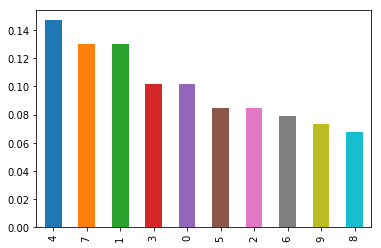

In [18]:
lotto9= df['2020'][['Digit0', 'Digit1', 'Digit2']].stack().value_counts(normalize=True)
lotto9.plot(kind='bar')

In [10]:
scifi_authors = ["Isaac zsimov", "Ray Brabury", "Robert Heinlein", "Arthur C. Clarke"]
scifi_authors.sort(key=lambda name: name.split()[-1].lower())
print(scifi_authors)

['Ray Brabury', 'Arthur C. Clarke', 'Robert Heinlein', 'Isaac zsimov']


In [14]:
dfc3['2020'].resample('3d').AnySame.value_counts(normalize=True)

Date        AnySame
2020-01-01  No         0.777778
            Yes        0.222222
2020-01-04  No         0.888889
            Yes        0.111111
2020-01-07  No         0.555556
            Yes        0.444444
2020-01-10  No         1.000000
2020-01-13  No         0.888889
            Yes        0.111111
2020-01-16  No         0.666667
            Yes        0.333333
2020-01-19  Yes        0.555556
            No         0.444444
2020-01-22  No         0.666667
            Yes        0.333333
2020-01-25  No         0.777778
            Yes        0.222222
2020-01-28  No         0.555556
            Yes        0.444444
2020-01-31  No         0.666667
            Yes        0.333333
2020-02-03  No         0.888889
            Yes        0.111111
2020-02-06  No         0.888889
            Yes        0.111111
2020-02-09  Yes        0.555556
            No         0.444444
2020-02-12  No         0.666667
            Yes        0.333333
2020-02-15  No         0.888889
            Yes     

In [10]:
weekAs=dfc3['2020'].resample('2d').AnySame.value_counts()
#weekAs[weekAs]
print((weekAs[weekAs==6]))
print(len(dfc3['2020']))

Date        AnySame
2020-01-03  No         6
2020-01-11  No         6
2020-02-04  No         6
2020-02-06  No         6
Name: AnySame, dtype: int64
134


In [125]:
#rowsofdata=111

days=6
dailySample=dfc3.resample('2d').AnySame.value_counts()
print(len(dailySample[dailySample==days]))
print(len(dfc3)/days)
#print((len(dailySample[dailySample==days])/(len(dfc3)/days))
#print(dailySample[dailySample==6]) # % of time No digit same will happen 
print(len(dailySample))



64
200.5
337


In [100]:
rowsofdata=111
dailySample=dfc3.tail(rowsofdata).resample('1d').AnySame.value_counts()
print(dailySample[dailySample==3].count()/(rowsofdata/3)) # % of time No digit same will happen 
dailySample.tail(rowsofdata)

0.5405405405405406


Date        AnySame
2019-12-31  No         3
2020-01-01  No         3
2020-01-02  No         2
            Yes        1
2020-01-03  No         3
2020-01-04  No         3
2020-01-05  No         2
            Yes        1
2020-01-06  No         3
2020-01-07  No         2
            Yes        1
2020-01-08  No         3
2020-01-09  No         2
            Yes        1
2020-01-10  No         3
2020-01-11  No         3
2020-01-12  No         3
2020-01-13  No         3
2020-01-14  No         2
            Yes        1
2020-01-15  No         3
2020-01-16  No         2
            Yes        1
2020-01-17  No         3
2020-01-18  No         2
            Yes        1
2020-01-19  No         2
            Yes        1
2020-01-20  No         2
            Yes        1
2020-01-21  No         3
2020-01-22  Yes        2
            No         1
2020-01-23  No         2
            Yes        1
2020-01-24  No         3
2020-01-25  No         2
            Yes        1
2020-01-26  No         2
     

In [31]:
rowsOfData=30
OneDayResample=dfc3.tail(rowsOfData).resample('1d').AnySame.value_counts()
print(OneDayResample[OneDayResample==3] , '\n')
print(dfc3.tail(days).AnySame.value_counts(normalize="True"), '\n')
print(OneDayResample)

Date        AnySame
2020-01-27  No         3
2020-01-28  No         3
2020-01-30  No         3
2020-02-01  No         3
2020-02-04  No         3
2020-02-05  No         3
Name: AnySame, dtype: int64 

No     0.833333
Yes    0.166667
Name: AnySame, dtype: float64 

Date        AnySame
2020-01-27  No         3
2020-01-28  No         3
2020-01-29  Yes        2
            No         1
2020-01-30  No         3
2020-01-31  No         2
            Yes        1
2020-02-01  No         3
2020-02-02  No         2
            Yes        1
2020-02-03  No         2
            Yes        1
2020-02-04  No         3
2020-02-05  No         3
Name: AnySame, dtype: int64


#df1=dfc3.set_index(['Date'])
#gb = df1.groupby(["TwoDigits"])
dfc3.tail(100).groupby(['TwoDigits']).resample('7d').count()

In [55]:
doubles=dfc3['2020'][dfc3['2020']['AnySame']=='Yes']
FirstLastQry=doubles['TwoDigits']=='EndSame'
#First2Qry=doubles['TwoDigits'].En).First2.value_counts()
#Last2Qry=doubles.groupby(['TwoDigits']).Last2.value_counts()
#print(FirstLastQry)
#print(First2Qry)
#print(Last2Qry)
doubles.head()

,WinNum,TimeOfDay,Digit0,Digit1,Digit2,First2,FirstLast,Last2,TwoDigits,AnySame,Combination
Date,,,,,,,,,,,
2020-01-02,353,Midday,3,5,3,35,33,53,EndsSame,Yes,335
2020-01-02,882,Evening,8,8,2,88,82,82,First2Same,Yes,288
2020-01-05,200,Midday,2,0,0,20,20,00,Last2Same,Yes,002
2020-01-07,355,Night,3,5,5,35,35,55,Last2Same,Yes,355
2020-01-08,939,Midday,9,3,9,93,99,39,EndsSame,Yes,399


In [32]:
dfc3.TwoDigits.value_counts(normalize=True)

NoneSame      0.728435
EndsSame      0.096645
Last2Same     0.089457
First2Same    0.085463
Name: TwoDigits, dtype: float64

In [25]:
dfc3['2019':'2020'].groupby(['TwoDigits']).TimeOfDay.value_counts(normalize=True)

TwoDigits   TimeOfDay
EndsSame    Evening      0.347107
            Night        0.347107
            Midday       0.305785
First2Same  Evening      0.364486
            Midday       0.317757
            Night        0.317757
Last2Same   Night        0.357143
            Evening      0.321429
            Midday       0.321429
NoneSame    Midday       0.341009
            Night        0.330044
            Evening      0.328947
Name: TimeOfDay, dtype: float64

In [6]:
rng0to999t=["%.3d" % i for i in range(1000)]

#Numbers not played from 2016 -2018
#vcWin=df.Win.value_counts().sort_index()
#vcWinIndex=vcWin.index
#NumsNotPlayed=set(rng0to999t).difference(vcWinIndex)
#print('Count of total numbers not played:',len(NumsNotPlayed))
#Filter repeating digits numbers out of Numbers not played  
Pick3NoRepeat=[i for i in rng0to999t if i[0]+ i[1]!='00' if i[0]+ i[1]!='11'
                       if i[0]+ i[1]!='22' if i[0]+ i[1]!='33' if i[0]+ i[1]!='44' 
                       if i[0]+ i[1]!='55' if i[0]+ i[1]!='66' if i[0]+ i[1]!='77' 
                       if i[0]+ i[1]!='88' if i[0]+ i[1]!='99' if i[1]+ i[2]!='00' 
                       if i[1]+ i[2]!='11' if i[1]+ i[2]!='22' if i[1]+ i[2]!='33' 
                       if i[1]+ i[2]!='44' if i[1]+ i[2]!='55' if i[1]+ i[2]!='66' 
                       if i[1]+ i[2]!='77' if i[1]+ i[2]!='88' if i[1]+ i[2]!='99' 
                       if i[0]+ i[2]!='00' if i[0]+ i[2]!='11' if i[0]+ i[2]!='22' 
                       if i[0]+ i[2]!='33' if i[0]+ i[2]!='44' if i[0]+ i[2]!='55' 
                       if i[0]+ i[2]!='66' if i[0]+ i[2]!='77' if i[0]+ i[2]!='88' 
                       if i[0]+ i[2]!='99']

#print(NoRepeatDigits)

Pick2NoRepeat=list(set([i[0:2] for i in Pick3NoRepeat]))
#len(set(Pick2NoRepeat))
print('Count of Pick 3 no repeat digits:',len(Pick3NoRepeat))
print('Count of Pick 2 no repeat digits:',len(Pick2NoRepeat))

Count of Pick 3 no repeat digits: 720
Count of Pick 2 no repeat digits: 90


dfc3.drop(['Combination'],inplace=True, axis=1)
dfc3.head()

In [7]:
#Reordering Digit0 - 2 lowest to highest and placing in tuple into the Combination Column
for index, row in dfc3.iterrows():
    a=(row['Digit0'] ,row['Digit1'],row['Digit2'])
    Maxa = max(a)
    Mina = min(a)
    maxmin=(Mina,Maxa)
    ChkDigitCount=list(set([x for x in a if a.count(x) > 1]))    
 #Check if digit exist more than once
    if (row['Digit0']==row['Digit1']) & (row['Digit0']==row['Digit2']):
        dfc3.at[index,'Combination']= a
        dfc3.at[index,'PermComb']=('AllDigitSame')
    elif ChkDigitCount==[]:
        MiddleNum =set(maxmin).symmetric_difference(a)
        result=str(MiddleNum).replace('{',"").replace('}',"")
        MiddleNum=result *1  #change string to integer
        #df18.set_value(index,'Combination', (Mina,MiddleNum,Maxa))
        dfc3.at[index,'Combination']=(Mina,MiddleNum,Maxa)
        dfc3.at[index,'PermComb']=('NoDigitSame') 
    elif ChkDigitCount[0] >= 0:
        #row['Combination']=(Mina,ChkDigitCount[0],Maxa)
        dfc3.at[index,'Combination']=(Mina,ChkDigitCount[0],Maxa) 
        dfc3.at[index,'PermComb']=('TwoDigitSame') 

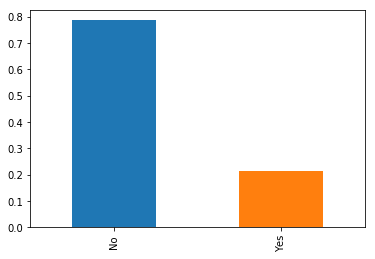

In [53]:
dfc3.tail(70).AnySame.value_counts(normalize=True).plot(kind='bar')

#Deletes last row
dfc3 = dfc3.iloc[:-1]

#Able to search for a First2 data
print('Count of Digit pulled', len(dfc3[dfc3['First2'] == '00']))
dfc3[dfc3['First2'] == '00']

days=41
# Last row in dataframe
lastrow=len(dfc3)
CurrentNumber=dfc3[-1:].WinNum.item()
#VcDays=dfc3.tail(days).First2.value_counts()
RangeNumPlayed=dfc3.iloc[lastrow-days:lastrow-1, 6:7].First2.value_counts()
NumPlayed=RangeNumPlayed.index
# String Numbers 0 - 99
rng0to99s=["%.2d" % i for i in range(100)] # Text range 0 to 99
rng0to9s=["%.1d" % i for i in range(10)] # Text range 0 to 99
NumNotPlayed=set(Pick2NoRepeat).difference(NumPlayed)
#last100=dfc3.iloc[lastrow-101:lastrow-1, 6:7]
#Gr1=(VcDays[VcDays >1])
#Digit 0 Filter
VcDigit0=dfc3.tail(days).Digit0.value_counts(normalize=True)
VcD0Filter=list(dfc3.iloc[lastrow-4:lastrow-1].Digit0)
VcD0FilterS=[str(i)for i in VcD0Filter]
VcD0=set(rng0to9s).difference(VcD0FilterS)
#VcD0Filter=list([VcDigit0[VcDigit0>VcDigit0.min()]][0].index)
NumsToPlayD0Filter=[i for i in NumNotPlayed for c in VcD0 if i[0]==c] 
#Digit 1 Filter
VcDigit1=dfc3.tail(days).Digit1.value_counts(normalize=True)
VcD1Filter=list(dfc3.iloc[lastrow-4:lastrow-1].Digit1)
VcD1FilterS=[str(i)for i in VcD1Filter]
VcD1=set(rng0to9s).difference(VcD1FilterS)
NumsToPlayD1Filter=[i for i in NumsToPlayD0Filter for c in VcD1 if i[1]==c] 
print('Current Number;', CurrentNumber)

#Digit 2 Filter
VcDigit2=dfc3.tail(days).Digit2.value_counts(normalize=True)
VcD2Filter=list(dfc3.iloc[lastrow-4:lastrow-1].Digit2)
VcD2FilterS=[str(i)for i in VcD2Filter]
VcD2=set(rng0to9s).difference(VcD2FilterS)
#NumsToPlayD2Filter=[i for i in NumsToPlayD0Filter for c in VcD1 if i[1]==c] 
#print('Percentange of Numbers Played More Than Once',(Gr1.sum()/days) * 100)
print(len(RangeNumPlayed),'Numbers were played in the last:', days, 'days')
print(list(NumPlayed),  '\n')
print(len(NumNotPlayed),'Numbers were not played in last ', days, 'days')
print(NumNotPlayed, '\n')
print(len(NumsToPlayD0Filter),'Numbers To play After Digit 0 Filter ', VcD0)
print(NumsToPlayD0Filter)
print('\n',len(NumsToPlayD1Filter),'Numbers To play After Digit 1 Filter', VcD1)
print(NumsToPlayD1Filter, '\n')
print('\n',len(VcD2),'Numbers To play After Digit 2 Filter', VcD2)

if CurrentNumber in VcD0Filter:
    print('True')
else:
    print(CurrentNumber, "was not played i last", days, 'days ')

#dfc3.tail(15)

#stack First2 & Last2 Columns
#numcount=dfc3.iloc[lastrow-days:lastrow-1, [6,8]].stack().value_counts()
#print((numcount[numcount>1]))


dfc3.tail(100).First2.value_counts()

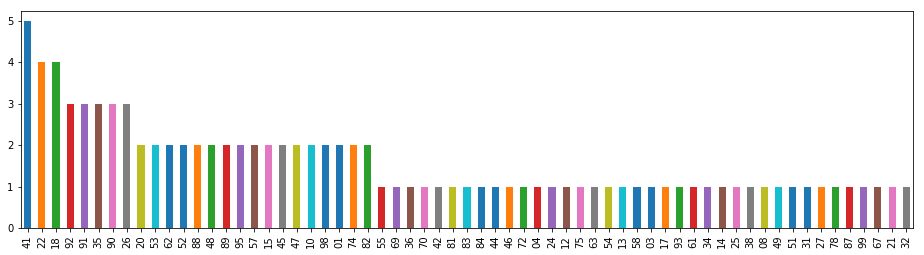

In [20]:
dfc3.tail(100).First2.value_counts().plot(kind='bar', figsize=(16,4))

# Start Data Analysis for 2018

In [52]:
dfc3.fillna(0, inplace=True)

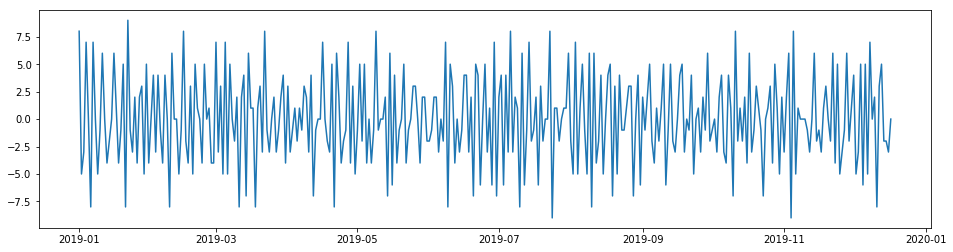

In [33]:
#df18['2018-08':'2018-10'].Digit0.value_counts(normalize=True).plot(kind='bar')
#df18['2018-08':'2018-10'].Digit0.plot()
plt.figure(1, figsize=(16, 4))
#plt.scatter(df18.index, df18.ShiftUp0Diff)
plt.plot(df19.index, df19.ShiftUp0Diff)

# Analysis for Evening Cash 3

In [ ]:
#Percentage of First2 numbers picked more or less than once in a 100 day interval
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'NumPkMoreThanOnce', 'NumPkOnce'
sizes = [len(NumPkMoreThanOnce),len(NumPkOnce)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()